In [1]:
# バージョン, ライブラリの準備
!pip install scikit-learn==0.20.3
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 75.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 15.0 MB/s eta 0:00:00


In [2]:
# ライブラリ
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import mglearn
import seaborn as sns

# 可視化
import matplotlib.pyplot as plt


In [3]:
# データセット準備
iris_df = sns.load_dataset('iris')

In [4]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# アイリスデータの説明
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# trainデータとtest_dataに分ける
y_col = 'species'
X = iris_df.drop(y_col, axis=1)
y = iris_df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### モデルを構築する前にデータを確認する


In [7]:
# X_trainのデータフレームをつくる
X_train_with_species = X_train.copy()
X_train_with_species['species'] = y_train

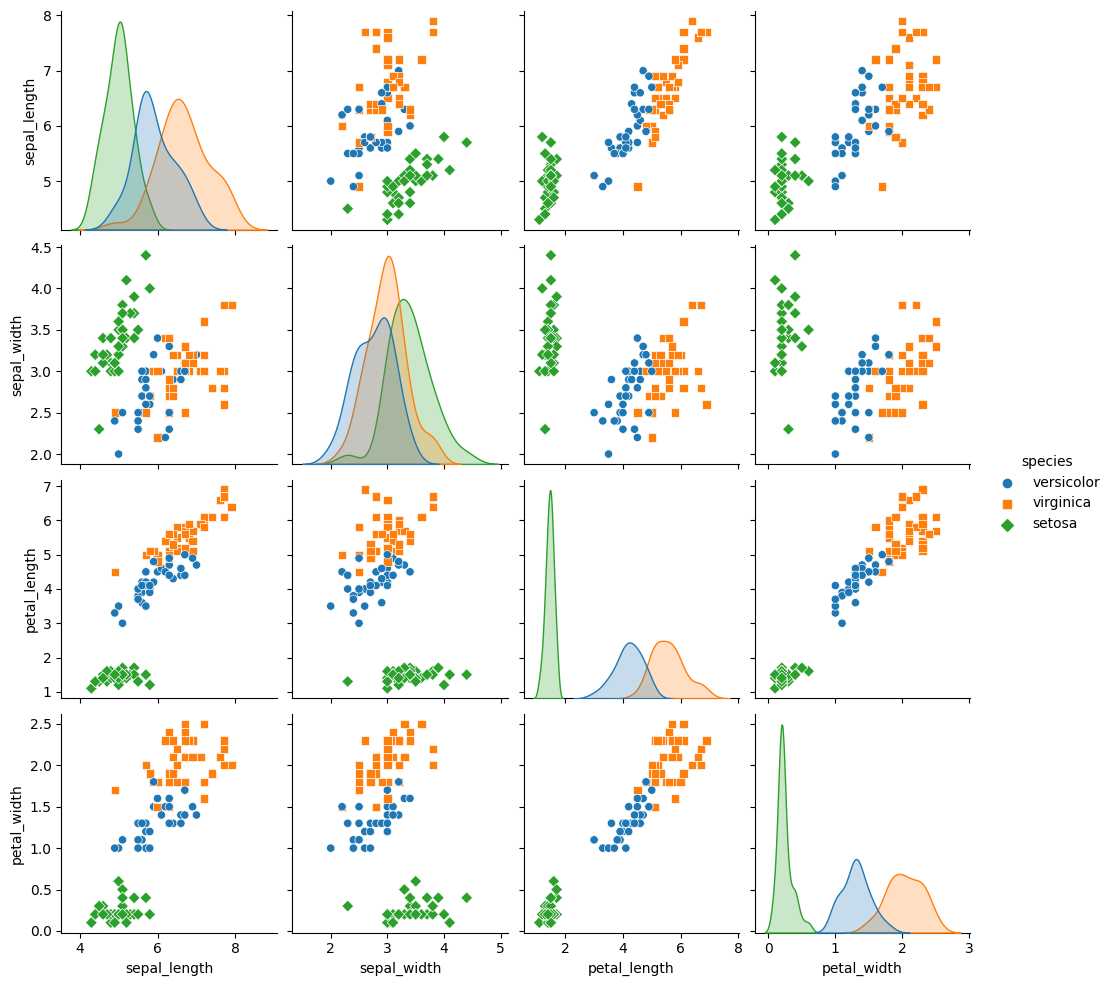

In [8]:
sns.pairplot(X_train_with_species, hue="species", markers=["o", "s", "D"])

## K-最近近傍法(KNN)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# 予測を行う
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [21]:
print(prediction)

['setosa']


### 1.7.6 モデルの評価


In [26]:
y_pred = knn.predict(X_test)
print(f'test set score : {np.mean(y_pred == y_test):.2f}')
print(f'test set score : {knn.score(X_test, y_test):.2f}')

test set score : 0.97
test set score : 0.97
